# Homework 3

## Pair Programming Group Number: 39
## Members of Team: Yixing Ma, Daniel Lam

## Feature engineering and linear regression

For this week's homework we are going to load in a data set that isn't in the "cleanest", repair it, add a feature, do some analysis on the features, build a linear regression model, and use that model to estimate numeric values.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data analytics. 

In [1]:
# only use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in the melb_data_sold_train.csv file here
df = pd.read_csv('https://gist.githubusercontent.com/TieJean/797fc6b68b98dc93d9270c1d9b5759d5/raw/a2d467663d9320913ca4b3c52aa75bb20e42988e/melb_data_sold_train.csv/')
df

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,85 Turner St,2,h,1480000.0,3/12/2016,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan
2,Abbotsford,129 Charles St,2,h,941000.0,7/05/2016,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.80410,144.99530,Northern Metropolitan
3,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan
4,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan
7996,Highett,23 The Crescent,3,h,1260000.0,29/07/2017,3190.0,3.0,1.0,0.0,642.0,NaN,NaN,Kingston,-37.94691,145.04935,Southern Metropolitan
7997,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan
7998,Hillside,1/14 Jade Wy,3,u,485000.0,29/07/2017,3037.0,3.0,2.0,2.0,345.0,NaN,2005.0,Melton,-37.70428,144.74705,Western Metropolitan


## Q1 Fix the dataframe to remove any blanks
The linear regression needs all attribute and dependent values to be defined.  Use list-wise deletion to remove entries with missing values. Save the modified dataframe with the indices reset to be $0-(length-1)$ into the variable `df1` for use in a later problem. 

In [2]:
df1 = df.dropna()
df1 = df1.reset_index(drop = True)
df1

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan


## Q2 Add a new feature
Toorak is known as one of the priciest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of $(-37.841820, 145.015986)$ for the center of Toorak.  You may assume the Earth is spherical and has radius of $6371.0088$km (check your function ... the property located at $(-37.68178,144.73779)$ is approx 30.2 km away)

In [3]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula
def hav_function(theta):
    return (1 - np.cos(theta)) / 2

def haversine_distance(pt1,pt2):
    #radius of earth
    r = 6371.0088
    #lat and long and then convert to radians
    coords = np.array([pt1[0], pt2[0], pt1[1], pt2[1]])
    rcoords = coords * (np.pi/180)
    # rcoords = np.radians(coords)
    #apply for hav(theta) and solve for distance
    h = hav_function(rcoords[1] - rcoords[0]) + np.cos(rcoords[0]) * np.cos(rcoords[1]) * hav_function(rcoords[3] - rcoords[2])
    distance = 2 * r * np.arcsin(np.sqrt(h))

    return distance 

In [4]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance(toorak_pt,[-37.68178,144.73779])


30.24477251358006

In [5]:
# Step 2 : Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
# to calculate the distance to Toorak for every row in our dataframe. Save the new dataframe as `df2`
pt = np.array([df1['Lattitude'] , df1['Longtitude']])
df1['distance_to_toorak'] = haversine_distance(pt, toorak_pt)
df2 = df1.copy()
df1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684


## Q3 Create a one hot encoding for the categorical column 'Type'
Modify the data frame `df2` such that it removes the column for `Type` and replaces it with the appropriate number of columns for a one-hot encoding of the column `Type` and save that dataframe as `df3` for use in a later problem. The pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be very useful here. 

In [6]:
df2 = df1.copy()
s = pd.Series(df2["Type"])
dumm = pd.get_dummies(s)
df2.insert(loc = 4, column = "t", value = dumm["t"])
df2.insert(loc = 4, column = "u", value = dumm["u"])
df2.insert(loc = 4, column = "h", value = dumm["h"])
df2 = df2.drop(columns = "Type")
df3 = df2.copy()
df2


,Suburb,Address,Rooms,h,u,t,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,1,0,0,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612
1,Abbotsford,124 Yarra St,3,1,0,0,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843
2,Abbotsford,98 Charles St,2,1,0,0,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206
3,Abbotsford,10 Valiant St,2,1,0,0,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655
4,Abbotsford,123/56 Nicholson St,2,0,1,0,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,1,0,0,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846
3906,Greensborough,12 Yangoora Pl,4,1,0,0,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623
3907,Highett,1/12 Jillian Av,3,0,0,1,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784
3908,Highett,31 The Crescent,4,0,0,1,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684


## Q4 Calculate the pairwise correlations between all of your numeric attributes
Use the Pearson correlation as discussed in the lectures to calculate the pairwise correlations between the attributes in the dataframe `df3`. Read the documentation for [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [7]:
df3.corr(method = "pearson", min_periods=1)

,Rooms,h,u,t,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak
Rooms,1.000000,0.501128,-0.535102,-0.040762,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232844
h,0.501128,1.000000,-0.778062,-0.484749,0.391761,-0.040504,0.484612,0.181773,0.214175,0.047422,0.306231,-0.402670,0.121254,-0.040387,0.221104
u,-0.535102,-0.778062,1.000000,-0.172282,-0.372766,0.051754,-0.518941,-0.282390,-0.236298,-0.005103,-0.321614,0.215689,-0.115991,0.028533,-0.238818
t,-0.040762,-0.484749,-0.172282,1.000000,-0.095295,-0.008546,-0.037366,0.108148,-0.006836,-0.067257,-0.032396,0.331105,-0.028636,0.023603,-0.014192
Price,0.502814,0.391761,-0.372766,-0.095295,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357013
Postcode,0.054676,-0.040504,0.051754,-0.008546,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008062
Bedroom2,0.941684,0.484612,-0.518941,-0.037366,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241515
Bathroom,0.593847,0.181773,-0.282390,0.108148,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051662
Car,0.401716,0.214175,-0.236298,-0.006836,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214759
Landsize,0.085676,0.047422,-0.005103,-0.067257,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041420


## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric attribute columns in `df3`, and specifying the home values (`Price` column) as the value we are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

The features you use to build the matrix $X$ should all be numeric and include the distance to Toorak and the one hot encodings. 

In [8]:
# Step one, build the matrix X
# Price column
# X all be numeric and include the distance to Toorak and the one hot encodings
x = pd.concat([pd.DataFrame({'intercept': np.ones(len(df3))}), df3.reset_index(drop=True)], axis=1)
x = x.drop(columns= ['Suburb', 'Address', 'Price', 'Date', 'CouncilArea', 'Regionname', 'Postcode' ])
X = x.values
X

array([[  1.        ,   2.        ,   1.        , ..., -37.8079    ,
        144.9934    ,   4.26161209],
       [  1.        ,   3.        ,   1.        , ..., -37.8024    ,
        144.9993    ,   4.62184333],
       [  1.        ,   2.        ,   1.        , ..., -37.806     ,
        144.9954    ,   4.37420597],
       ...,
       [  1.        ,   3.        ,   0.        , ..., -37.94775   ,
        145.02379   ,  11.79878382],
       [  1.        ,   4.        ,   0.        , ..., -37.94633   ,
        145.04947   ,  11.98668407],
       [  1.        ,   4.        ,   1.        , ..., -37.68104   ,
        144.74608   ,  29.70816349]])

In [9]:
# Step two, build the column vector y
y = df3[['Price']]
Y = y.values
Y

array([[1035000.],
       [1876000.],
       [1636000.],
       ...,
       [1200000.],
       [1200000.],
       [ 618350.]])

In [10]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)
(beta_hat, residuals, rank, s) = np.linalg.lstsq(X, Y, rcond=-1)
beta_hat

array([[-1.93046775e+07],
       [ 1.33252662e+05],
       [-6.26382616e+06],
       [-6.58668726e+06],
       [-6.45416412e+06],
       [ 2.65191413e+04],
       [ 2.11444638e+05],
       [ 5.27916046e+04],
       [ 1.96391910e+01],
       [ 1.24398796e+03],
       [-3.20399602e+03],
       [-8.53091862e+05],
       [ 1.25436026e+03],
       [-4.15728653e+04]])

In [11]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
np.matmul(X[23],beta_hat) 


array([670422.46956736])

In [12]:
# This is the actual price at this point
Y[23]

array([805000.])

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the $\hat{\beta}$ you calculated in the last step to predict the housing prices for data in melb_data_sold_test.  Create a visualization that shows the absolute error in your predictions. Remember to do all your data pre-processing on the data loaded from the melb_data_sold_test file before you apply beta_hat.  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient.  Use [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for reference. 

While doing imputation, there are some helpful parameters in [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 

In [13]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.
testset = pd.read_csv('https://gist.githubusercontent.com/TieJean/e17178b1ffcb594dbf2232de90f8bb1f/raw/17c751b38a159b246321100188f35fa7cfb6c0b9/melb_data_sold_test.csv')
testset = testset.fillna(0)
cols = ['Car','BuildingArea', 'YearBuilt']
testset.isnull().sum()


Suburb          0
Address         0
Rooms           0
Type            0
Price           0
Date            0
Postcode        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Lattitude       0
Longtitude      0
Regionname      0
dtype: int64

In [14]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame
testset['distance_to_toorak'] = df2['distance_to_toorak']
testset.insert(loc = 4, column = 'h', value = x['h'])
testset.insert(loc = 5, column = 'u', value = x['u'])
testset.insert(loc = 6, column = 't', value = x['t'])
testset = testset.drop(columns='Type')
testset

,Suburb,Address,Rooms,h,u,t,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Jacana,29 Fox Ct,3,1,0,0,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,0.0,0.0,Hume,-37.68907,144.91459,Northern Metropolitan,4.261612
1,Keilor Park,45 Collinson St,3,1,0,0,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.0,1980.0,Brimbank,-37.72224,144.85739,Western Metropolitan,4.621843
2,Kensington,42 Gower St,3,1,0,0,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,0.0,0.0,Melbourne,-37.79560,144.92779,Northern Metropolitan,4.374206
3,Kew,6/385 Barkers Rd,3,1,0,0,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.0,1980.0,Boroondara,-37.81614,145.05056,Southern Metropolitan,4.780655
4,Kew,11 Raheen Dr,4,0,1,0,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.0,1970.0,Boroondara,-37.80437,145.01725,Southern Metropolitan,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Wantirna South,15 Mara Cl,4,0,0,1,1330000.0,26/08/2017,3152.0,4.0,2.0,2.0,717.0,191.0,1980.0,0,-37.86887,145.22116,Eastern Metropolitan,5.692685
1017,Werribee,5 Nuragi Ct,4,1,0,0,635000.0,26/08/2017,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,0,-37.89327,144.64789,Western Metropolitan,4.098133
1018,Westmeadows,9 Black St,3,1,0,0,582000.0,26/08/2017,3049.0,3.0,2.0,2.0,256.0,0.0,0.0,0,-37.67917,144.89390,Northern Metropolitan,4.058104
1019,Wheelers Hill,12 Strada Cr,4,1,0,0,1245000.0,26/08/2017,3150.0,4.0,2.0,2.0,652.0,0.0,1981.0,0,-37.90562,145.16761,South-Eastern Metropolitan,3.363975


In [15]:
# Step two, build the attribute matrix Xdot 
xdot = pd.concat([pd.DataFrame({'intercept': np.ones(len(df2))}), df2.reset_index(drop=True)], axis=1)
xdot = xdot.drop(columns= ['Suburb', 'Address', 'Price', 'Date', 'CouncilArea', 'Regionname', 'Postcode' ])
Xdot = xdot.values

In [16]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes
beta_hat.tolist()
t_beta_hat = np.array([beta_hat])
new_beta = t_beta_hat.T
y_hat = np.matmul(xdot.values, new_beta)


In [17]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"
absolute_error = np.absolute(np.subtract(Y, y_hat))
absolute_error

array([[[199549.2075186 ],
        [130705.30873064],
        [233331.25747915],
        ...,
        [345389.46994196],
        [ 67246.94257111],
        [ 78657.40242701]]])

Text(0.5, 1.0, 'Comparison of the Absolute Error and the Sales Price')

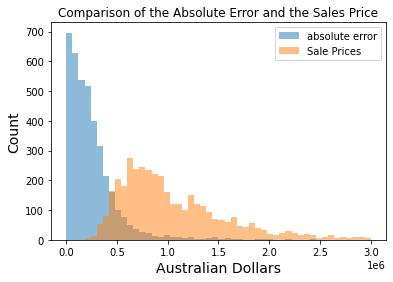

In [18]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent 
absolute_error = absolute_error[0, :, :]
lim = [0,3e6]
plt.hist(absolute_error, bins=50, alpha=0.5, range = lim , label="absolute error")
plt.hist(Y, bins=50, alpha=0.5, range = lim, label="Sale Prices")
plt.legend()
plt.xlabel("Australian Dollars", size=14)
plt.ylabel("Count", size=14)
plt.title("Comparison of the Absolute Error and the Sales Price")
